In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')


In [24]:

df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

print(df.isnull().sum())

print(df.dtypes)

df.describe()



The dataset contains 569 rows and 32 columns.
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
id           

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:

df.dropna(inplace=True)

print(f"Duplicate rows: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)


Duplicate rows: 0


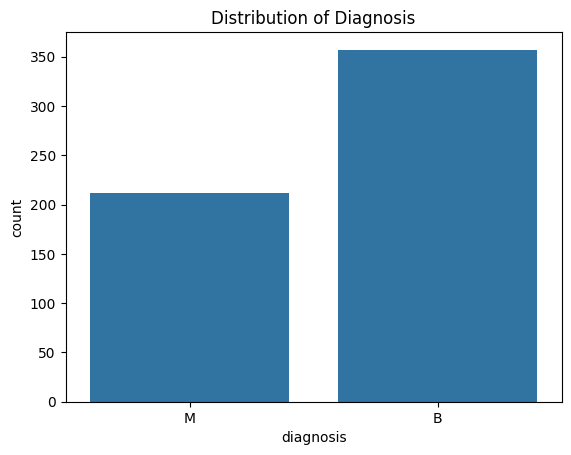

In [27]:

sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()


In [28]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'M'

<Figure size 1200x1000 with 0 Axes>

In [ ]:

print(df.dtypes)


In [ ]:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:

df_numeric = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()


In [ ]:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:

X = df.drop(columns=['diagnosis', 'id']) 
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

print(df.groupby('diagnosis').mean())


correlation = df.corr()['diagnosis'].sort_values(ascending=False)
print(correlation)


In [ ]:
import pandas as pd


df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv")
print(df.head())


print(df.shape)

print(df.isnull().sum())


In [ ]:

df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv", delimiter=';')  # Example for semicolon


In [ ]:

with open(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv", 'r') as file:
    for i in range(5):  # Print the first 5 lines
        print(file.readline())


In [ ]:

print(df.columns)


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv")

print("First few rows of the dataset:")
print(df.head())


print("\nShape of the dataset:")
print(df.shape)


print("\nMissing values in each column:")
print(df.isnull().sum())


print("\nColumn names:")
print(df.columns)


In [ ]:

print(df.dtypes)


In [ ]:

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:

df_numeric = df.drop(columns=['id'])  


plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()


In [ ]:

sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()


In [ ]:

print(df.describe())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['diagnosis'])  
y = df['diagnosis']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

print(df.groupby('diagnosis').mean())

correlation = df.corr()['diagnosis'].sort_values(ascending=False)
print(correlation)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['diagnosis'] == 0][feature], color='blue', label='Benign', kde=True)
    sns.histplot(df[df['diagnosis'] == 1][feature], color='red', label='Malignant', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


In [ ]:
df.to_excel(r'C:\Users\laptop\Downloads\archive (2)\processed_data.xlsx', sheet_name='Sheet1', index=False)


In [ ]:
df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv")
X = df.drop('diagnosis', axis=1) 
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
df = pd.read_csv(r"C:\Users\laptop\Downloads\archive (2)\breast-cancer.csv")
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ml_model = LogisticRegression(max_iter=1000)
ml_model.fit(X_train_scaled, y_train)
y_pred_ml = ml_model.predict(X_test_scaled)
accuracy_ml = accuracy_score(y_test, y_pred_ml)
precision_ml = precision_score(y_test, y_pred_ml)
f1_ml = f1_score(y_test, y_pred_ml)
recall_ml = recall_score(y_test, y_pred_ml)

ml_performance = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_ml,
    "Precision": precision_ml,
    "F1 Score": f1_ml,
    "Recall": recall_ml
}


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)
y_pred_ann_prob = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)

ann_performance = {
    "Model": "ANN",
    "Accuracy": accuracy_ann,
    "Precision": precision_ann,
    "F1 Score": f1_ann,
    "Recall": recall_ann
}


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5914 - loss: 0.6777 - val_accuracy: 0.8791 - val_loss: 0.4084
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9368 - loss: 0.3456 - val_accuracy: 0.9451 - val_loss: 0.2423
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9439 - loss: 0.2210 - val_accuracy: 0.9451 - val_loss: 0.1790
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9613 - loss: 0.1513 - val_accuracy: 0.9560 - val_loss: 0.1482
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9606 - loss: 0.1244 - val_accuracy: 0.9560 - val_loss: 0.1307
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9780 - loss: 0.1052 - val_accuracy: 0.9670 - val_loss: 0.1188
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.0907 - val_accuracy: 0.9670 - val_loss: 0.1099
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9925 - loss: 0.0640 - val_accuracy: 0.9670 - val_loss

In [36]:
import pandas as pd
performance_df = pd.DataFrame([ml_performance, ann_performance])
print(performance_df)

                 Model  Accuracy  Precision  F1 Score    Recall
0  Logistic Regression  0.973684    0.97619  0.964706  0.953488
1                  ANN  0.973684    0.97619  0.964706  0.953488


In [37]:
import pandas as pd
performance_df = pd.DataFrame([ml_performance, ann_performance])
performance_df.to_excel('performance_report.xlsx', index=False)